In [1]:
import dgl
import torch
import torch.nn as nn
from dgl.nn import GINEConv,GATConv,GraphConv
import numpy as np
import time
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
from torchvision.datasets import STL10
from torchvision import transforms

target_size=(224,224)
transform=transforms.Compose([
    transforms.Resize(target_size),
    transforms.ToTensor()
])

STL10_train = STL10("STL10", split='train', download=True, transform=transform)
 
STL10_test = STL10("STL10", split='test', download=True, transform=transform)


Files already downloaded and verified
Files already downloaded and verified


In [10]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [3]:
g=dgl.graph(([0,1,2,1],
             [1,2,1,0]))
in_feat=10
out_feat=2
batch=10
graphs=[]
n_feat=torch.randn(g.num_nodes(),in_feat,in_feat)
e_feat=torch.randn(g.num_edges(),in_feat)
print(n_feat.shape)
print(e_feat.shape)

torch.Size([3, 10, 10])
torch.Size([4, 10])


In [39]:
dence=nn.Linear(28,10)
input_feat=torch.randn(64,3,28)
conv=GraphConv(10,5)

In [40]:
pred=dence(input_feat)
pred=conv(pred)

TypeError: forward() missing 1 required positional argument: 'feat'

In [38]:
print(pred.shape)
h=torch.mean(pred,1)
print(h.shape)

torch.Size([64, 3, 10])
torch.Size([64, 10])


In [66]:
conv=GraphConv(10,10)
dence=nn.Linear(10,10)
pred=conv(g,n_feat)
dpred=dence(pred)

In [68]:
print(dpred.shape)
g.ndata['h']=dpred
h=dgl.mean_nodes(g,'h')
print(h)

torch.Size([3, 10, 10])
tensor([[[-2.1786e-01,  3.1594e-01,  9.3604e-01, -2.6774e-01, -2.3542e-01,
           1.7184e-01,  2.3204e-01,  5.0437e-03, -2.7512e-01, -3.3363e-01],
         [ 1.6830e-01,  4.8890e-01,  6.9864e-01,  4.0018e-01,  5.1554e-01,
          -4.4509e-01,  6.2782e-01, -4.3453e-01, -1.6327e-01, -1.5971e-01],
         [ 3.9357e-02,  1.2269e-01,  4.7608e-01,  2.2463e-01,  2.6207e-02,
          -6.1421e-02,  4.2826e-01, -1.7934e-01, -1.1413e-01, -3.4289e-01],
         [ 9.4425e-04, -8.1179e-02,  1.1839e-01,  1.2345e-01, -2.2021e-01,
          -3.1937e-01,  4.9197e-01,  1.7545e-01, -2.1814e-01, -1.7932e-01],
         [-7.5488e-02, -3.5557e-01, -2.8717e-01, -1.7888e-01, -5.6785e-01,
           8.1161e-01,  6.5802e-01,  4.1074e-01, -1.1452e-02, -1.6046e-01],
         [ 3.1756e-01, -3.0613e-01,  3.4639e-01,  5.4851e-01, -7.7183e-01,
           6.3968e-01,  1.5257e-01, -6.0542e-01,  8.8246e-02, -7.1293e-01],
         [ 2.0407e-01, -3.6752e-01, -6.6260e-02,  3.2958e-01, -1.6515e

In [64]:
print(n_feat[0])
print(pred[0])

tensor([[ 0.2123, -1.4321,  0.9866,  0.6709,  0.3180, -0.9191, -0.4450, -1.3862,
         -0.4180,  0.1391],
        [ 1.4401, -1.1145,  1.1312, -0.6538,  0.3825,  1.0007,  0.2166,  0.4914,
          0.1709, -0.1998],
        [-1.1120, -0.6880,  1.4970, -0.1417,  1.0001,  0.5353, -0.6821, -0.7202,
         -1.4415, -0.1671],
        [-0.7591,  0.3129,  2.1340,  0.7881,  1.8305,  0.0678, -1.9767, -0.7072,
          0.6836, -0.9497],
        [-0.1965, -0.0991,  1.0064,  0.7515, -0.3467,  0.7774,  0.4457,  0.1097,
          1.0797,  0.8987],
        [ 0.1503,  0.5301,  1.2479, -2.1161, -0.9152,  1.4605,  0.4894,  0.0145,
         -1.0747, -0.1497],
        [-1.8838,  1.3191,  1.1115, -1.0673, -2.0064,  0.6413, -0.8466,  1.4251,
          1.9557, -0.5547],
        [ 0.7557, -1.8897, -0.3260, -2.1301, -1.5715,  0.5350, -0.7828,  1.9769,
          1.9442, -2.2009],
        [ 0.1964, -0.2310,  0.2460,  0.4837, -1.4757, -0.1890, -0.3254, -1.3986,
         -0.2179,  1.0893],
        [ 1.3379, -

In [73]:
def get_nearest_neighbors(image, row, col):
    # 画像の形状を取得
    height, width = image.shape[:2]

    # 注目画素の周囲8画素の座標を計算
    neighbors_coords = [(row-1, col-1), (row-1, col), (row-1, col+1),
                        (row, col-1), (row, col+1),
                        (row+1, col-1), (row+1, col), (row+1, col+1)]

    # 注目画素の最近傍画素の値を抜き出す
    nearest_neighbors = []
    for r, c in neighbors_coords:
        # 座標が画像範囲内かチェック
        if 0 <= r < height and 0 <= c < width:
            pixel_value = image[r, c]
            nearest_neighbors.append(pixel_value)
        else:
            # 画像範囲外の場合は0を追加するなど適切な処理を行う
            #nearest_neighbors.append(0)
            pass

    return nearest_neighbors

In [72]:
def image_patch(image,num_patch):
    #画像サイズ
    size=image.shape[1]
    #1パッチ当たりの画素数
    patch_width=int(size/num_patch)
    #パッチ保存用配列
    data=[]

    for i in range(0,size,patch_width):
        for j in range(0,size,patch_width):
            data.append(image[:, i : i + patch_width, j : j + patch_width])
    
    return torch.stack(data,dim=0)

In [71]:
def make_graph(side_length):
    g=dgl.DGLGraph()
    g.add_nodes(side_length**2)
    square_list = np.arange(side_length**2).reshape((side_length, side_length))
    #ノード番号に対応したインデックスを取得
    inds=np.ndindex(square_list.shape)
    inds=[idx for idx in inds]
    #各ノードと最近傍ノード間にエッジを張る
    for i in range(side_length**2):
        x,y=inds[i]
        flatt_nh=get_nearest_neighbors(square_list,x,y)
        for j in flatt_nh:
            if i == j:
                continue
            else:
                g.add_edges(j,i)
    return g

In [74]:
st=time.time()
for image,label in tqdm(STL10_train):
    n_feat=image_patch(image,8)
print(time.time()-st)

100%|██████████| 5000/5000 [00:04<00:00, 1014.56it/s]

4.930156707763672


In [86]:
print(STL10_train[0][0].max())

tensor(0.9961)


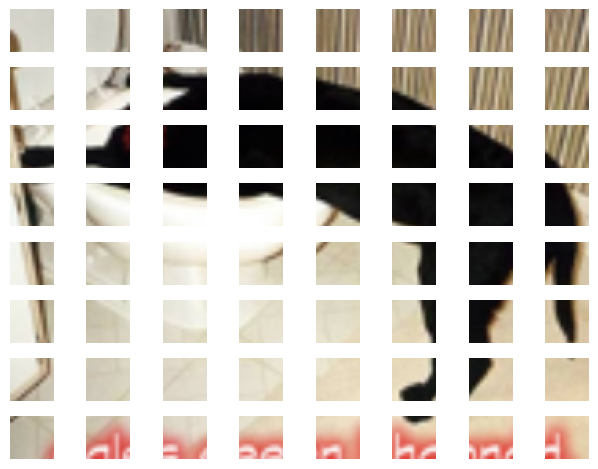

patch num: 8  patch pic size: 28  class: 5


In [80]:
fig = plt.figure()
num_patch=8
patch_width=int(224/num_patch)
# 画像を追加
for i in range(num_patch**2):
    ax = fig.add_subplot(num_patch, num_patch, i+1)
    ax.imshow(n_feat.permute(0,2,3,1)[i])
    ax.axis('off')

# 画像を表示
plt.tight_layout()
plt.show()
print(f'patch num: {num_patch}  patch pic size: {patch_width}  class: {label}')

In [32]:
print(n_feat)
print(e_feat)
conv=GINEConv(nn.Linear(in_feat,out_feat))
res=conv(g,n_feat,e_feat)
print(res)

tensor([[ 0.5888, -0.8675,  0.4436],
        [ 2.4353, -2.4259, -0.3092],
        [ 0.2220, -2.3916,  1.8348]])
tensor([[-0.4855,  0.0899, -1.2415],
        [ 1.0146, -0.0956,  0.1709],
        [ 0.9142,  0.9067, -0.5644],
        [-0.8427,  1.1041,  1.7460]])
tensor([[ 1.0899, -1.3193],
        [ 0.1359, -1.3522],
        [ 0.6151, -1.8083]], grad_fn=<AddmmBackward0>)


In [79]:
a=torch.randn((10,10,3))
b=torch.randn((10,10,3))
c=a.detach()

In [81]:
cos=nn.CosineSimilarity(0)
output=torch.cosine_similarity(a.flatten(),b.flatten(),dim=0)
print(output.item())

-0.09277930855751038


In [ ]:
g=dgl.graph(([0,1,2,1],
             [1,2,1,0]))
in_feat=2
out_feat=2
n_feat=torch.randn(g.num_nodes(),in_feat)
e_feat=torch.randn(g.num_edges(),in_feat)

In [67]:
gat1=GATConv(in_feat,10,2)
pred=gat1(g,n_feat,e_feat,get_attention=True)